# Module 7: Data Wrangling: Join, Combine, and Reshape

<sub><sup>The notebook is prepared based on the eight chapter of McKinney, M. (2017). Python for Data Analysis, O'Reilly. ISBN 9781491957660. 
<br>Additionally, the content from https://www.kite.com/blog/python/pandas-pivot-table/ and https://cmdlinetips.com/2018/12/pivot-table-in-python-pandas/ were also partially used.</sup></sub>

In many applications, data may be spread across number of files or databases, or be arranged in a for that is not easy to analyze.
Knowing how to combine, join and rearrange data is an important skill in the Data Analyst toolkit.

## 1. Hierarchical Indexing
It is an important feature in `pandas` that enables you to have multiple index *levels* on an axis.
It provides a way to work with higher dimensional data in lower dimensional form.

 Let’s start
with a simple example. First, we will create a multi-index dataframe as shown below:

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(15)

frame = pd.DataFrame(np.random.randint(20, size=16).reshape((4, 4)),
                     index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                     columns=[['Ohio', 'Ohio', 'Colorado', 'Colorado'],
                              ['Green', 'Red', 'Green', 'Red']])

frame

Ohio     Colorado    
    Green Red    Green Red
a 1     8  12        5   0
  2     7  11       15  17
b 1    13   0       10  15
  2     4   9        7   5

Indexing with multi-indexed dataframes is a bit more complicated, especially if you want to work with the indices beyond the first level.

Let's initially work with the 1st level indices. We will select the `Ohio` column in the dataframe:


In [ ]:
frame['Ohio']

Green  Red
a 1      8   12
  2      7   11
b 1     13    0
  2      4    9

Now, we will select the `Ohio` column for the row index `a`. Here, we should use the `loc` function without a problem:

In [ ]:
frame.loc['a', 'Ohio']

,Green,Red
1,8,12
2,7,11


As you have seen, indexing at level 1 is the same as single-index dataframes.

When you move to the 2nd level, however, then you will need to use `tuples`. We will use `loc` to select the `Green` sub-columns for `Ohio` columns:

In [ ]:
frame.loc[:, ('Ohio', 'Green')]

a  1     8
   2     7
b  1    13
   2     4
Name: (Ohio, Green), dtype: int64

If you do not want to indicate the first-level index and select all sub `Green` columns for all states, then you can use `slice(None)` function, as seen below:

In [ ]:
frame.loc[:, (slice(None), 'Green')]

Ohio Colorado
    Green    Green
a 1     8        5
  2     7       15
b 1    13       10
  2     4        7

The hierarchical levels can have names (as strings or any Python objects). If so, these
will show up in the console output:

In [ ]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado    
color     Green Red    Green Red
key1 key2                       
a    1        8  12        5   0
     2        7  11       15  17
b    1       13   0       10  15
     2        4   9        7   5

At times you will need to rearrange the order of the levels on an axis or sort the data by the values in one specific level. 

The `swaplevel` takes two level numbers or names
and returns a new object with the levels interchanged (but the data is otherwise unaltered):

In [ ]:
frame.swaplevel('key1', 'key2')

state      Ohio     Colorado    
color     Green Red    Green Red
key2 key1                       
1    a        8  12        5   0
2    a        7  11       15  17
1    b       13   0       10  15
2    b        4   9        7   5

You can also indicate the levels using 0 (1st level) and 1 (2nd level):

In [ ]:
frame.swaplevel(0, 1)

state      Ohio     Colorado    
color     Green Red    Green Red
key2 key1                       
1    a        8  12        5   0
2    a        7  11       15  17
1    b       13   0       10  15
2    b        4   9        7   5

When swapping levels, it is common to also use `sort_index` so that the result is alphabetically sorted by the indicated level:

In [ ]:
frame.swaplevel(0,1).sort_index(level=0)

state      Ohio     Colorado    
color     Green Red    Green Red
key2 key1                       
1    a        8  12        5   0
     b       13   0       10  15
2    a        7  11       15  17
     b        4   9        7   5

You can also swap the levels for columns by passing `axis=1`:

In [ ]:
frame.swaplevel('state', 'color', axis=1)

color     Green  Red    Green      Red
state      Ohio Ohio Colorado Colorado
key1 key2                             
a    1        8   12        5        0
     2        7   11       15       17
b    1       13    0       10       15
     2        4    9        7        5

### In-class Exercise

Import the `student-visits.xlsx` file. In this file, there is data about students' visits to different content of an online course in different week days.

In [ ]:
visits = pd.read_excel('student-visits.xlsx', index_col = [0,1])
visits.head(10)

PPT  Video  Quiz  Assignment
WeekDay Student                              
1       6          0      1     0           0
        9          1      0     1           1
        10         1      1     0           1
        1          1      0     1           1
        2          0      1     0           1
        3          1      1     1           0
        4          0      0     0           0
        5          1      1     1           1
        7          1      1     1           0
        8          1      0     1           0

First, we want to make `Student` column as the level-1 index and `WeekDay` as the level-2. 

Let's use `swaplevels` function to switch the levels:

In [ ]:
visits = visits.swaplevel(0,1)
visits.head(3)

,,PPT,Video,Quiz,Assignment
Student,WeekDay,,,,
6,1,0,1,0,0
9,1,1,0,1,1
10,1,1,1,0,1


Levels are swapped. But, the data is still ordered by WeekDay. We want to sort the data based on `Student` index:

In [ ]:
visits.sort_index(0, inplace = True)
visits.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  """Entry point for launching an IPython kernel.


PPT  Video  Quiz  Assignment
Student WeekDay                              
1       1          1      0     1           1
        2          0      0     0           1
        3          1      0     0           1
        4          1      1     0           0
        5          0      1     1           0
        6          0      0     1           0
        7          0      0     1           0
2       1          0      1     0           1
        2          0      0     1           0
        3          0      0     1           1

## 2. Indexing with a DataFrame's columns
It’s usual to use one or more columns from a DataFrame as the row
index. DataFrame’s `set_index` function will create a new DataFrame using one or more of its columns as the index. 

In [ ]:
frame = pd.DataFrame({'a': range(7), 'b':range(7,0,-1),
                     'c':['one', 'one', 'one', 'two', 'two',
                          'two', 'two'],
                      'd': [0,1,2,0,1,2,3]})
frame                 

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [ ]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

By default the columns are removed from the DataFrame, though you can leave them
in:

In [ ]:
frame.set_index(['c','d'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3


`reset_index`, on the other hand, does the opposite of `set_index`; the hierarchical
index levels are moved into the columns

In [ ]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


### In-Class Exercise (Contd')

Import the `student-visits.xlsx` file without indicating the indices:

In [ ]:
visits = pd.read_excel('student-visits.xlsx')
visits.head(3)

,WeekDay,Student,PPT,Video,Quiz,Assignment
0,1,6,0,1,0,0
1,1,9,1,0,1,1
2,1,10,1,1,0,1


Now, set the `Student` and `WeekDay` columns as the row indices:

In [ ]:
visits.set_index(['Student', 'WeekDay'])

,,PPT,Video,Quiz,Assignment
Student,WeekDay,,,,
6,1,0,1,0,0
9,1,1,0,1,1
10,1,1,1,0,1
1,1,1,0,1,1
2,1,0,1,0,1
...,...,...,...,...,...
9,7,1,1,1,0
10,7,0,0,1,0
4,7,0,0,1,0


Reset the indices:

In [ ]:
visits.reset_index()

,index,WeekDay,Student,PPT,Video,Quiz,Assignment
0,0,1,6,0,1,0,0
1,1,1,9,1,0,1,1
2,2,1,10,1,1,0,1
3,3,1,1,1,0,1,1
4,4,1,2,0,1,0,1
...,...,...,...,...,...,...,...
65,65,7,9,1,1,1,0
66,66,7,10,0,0,1,0
67,67,7,4,0,0,1,0
68,68,7,6,0,1,1,0


## 3. Combining and Merging Datasets
Data in pandas can be combined in many ways:
* `pandas.merge` connects rows in DataFrames based on 1 or more keys. This is similar to `join` operations in SQL.
* `pandas.concat` concatenates or `stacks` together objects along an axis.

* `combine_first` method enables splicing together overlapping data to fill in missing values in one object from another. 

### 3.1. Database-Style DataFrame Joins
Merge or join operations combine datasets by linking rows using one or more keys.
These operations are central to relational databases (e.g., SQL-based). 

The `merge` function in pandas is the main entry point for using these algorithms on your data.

Let's first create two dataframes with a common column called `key`:

In [ ]:
df1 = pd.DataFrame({'key': ['b','b','a','c','a','a','b'],
                   'data1':range(7)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [ ]:
df2 = pd.DataFrame({'key':['a','b','d'],
                   'data2': range(3)})
df2

,key,data2
0,a,0
1,b,1
2,d,2


We will merge these two datasets. This is an example of a **many-to-one** join; the data in df1 has multiple rows labeled `a` and `b`, whereas df2 has only one row for each value in the key column. 

Since, these two dataframes has only a single common column (called `key`), we can directly pass them to the `merge` function without additional arguments:

In [ ]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Since there was an overlapping column between the dataframes (`key`) we did not have to specify on which column to apply the join.

However, it is a better practice to always specify this join column using the `on` argument:

In [ ]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


If the column names are different in each object, you can specify them separately:

In [ ]:
df3 = pd.DataFrame({'lkey': ['b','b','a','c','a','a','b'],
                   'data1':range(7)})
df4 = pd.DataFrame({'rkey':['a','b','d'],
                   'data2': range(3)})
print(df3.head())
print(df4.head())

  lkey  data1
0    b      0
1    b      1
2    a      2
3    c      3
4    a      4
  rkey  data2
0    a      0
1    b      1
2    d      2


You should specify the key columns in both datasets using `left_on` and `right_on`:

In [ ]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


You may notice that the 'c' and 'd' values and associated data are missing from the result. 

This is because by default merge does an **inner** join; the keys in the result are the intersection, or the common set found in both tables. 

Other possible options are `left`, `right`, and `outer`. 

<img src="https://arc2r.github.io/book/images/joins.png" alt="drawing" width="500"/>

<sub><sup>Image is retrieved from https://medium.com/swlh/merging-dataframes-with-pandas-pd-merge-7764c7e2d46d</sup></sub>



The `outer` join takes the union of the keys, combining the
effect of applying both left and right joins:

In [ ]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


### In-Class Exercise [Contd']

We will import two datasets: 
* `day1-visits.xlsx` (*students' visits on the first day*) and 
* `day2-visits.xlsx` (*students' visits on the second day*).

In [ ]:
day1 = pd.read_excel('day1-visits.xlsx');
day1

,Student,PPT,Video,Quiz,Assignment
0,1,0,1,0,1
1,2,1,1,0,1
2,3,0,0,0,0
3,4,1,0,1,0
4,5,0,0,0,0
5,6,0,0,0,0
6,7,0,0,1,0
7,8,0,1,1,1


In [ ]:
day2 = pd.read_excel('day2-visits.xlsx');
day2

,StudentId,PPT,Video,Quiz,Assignment
0,3,0,0,1,1
1,4,1,1,0,1
2,5,1,1,1,0
3,6,0,0,0,0
4,7,1,0,1,1
5,8,1,0,0,1
6,9,1,1,0,0
7,10,0,0,0,1


As you see, while the first data set has the data for students from 1 to 8, the second data set contains data for students from 3 to 10.

We want to join these two datasets to contain day1 and day2 visits for each student in a single dataframe. Obviously the join should be on the `Student` column.

However, the same column names are repeated in both set (`PPT	Video	Quiz	Assignment`). Before the merge, we should update the column names properly so that we can identfy if a column (e.g., Assignment) is for day 1 or day 2 after the merge.

What we will do is to add `1_` and `2_` prefix to column names in `day1` and `day2` dataframes respectively.

We can use list comprehensions for this purpose:

In [ ]:
 ["1_" + name for name in day1.columns]

['1_Student', '1_PPT', '1_Video', '1_Quiz', '1_Assignment']

In [ ]:
 ["1_" + name for name in day1.columns if name !='Student']

['1_PPT', '1_Video', '1_Quiz', '1_Assignment']

In [ ]:
 day1.columns = ["1_" + name if name !='Student' else 'Student' for name in day1.columns]
 day1

,Student,1_PPT,1_Video,1_Quiz,1_Assignment
0,1,0,1,0,1
1,2,1,1,0,1
2,3,0,0,0,0
3,4,1,0,1,0
4,5,0,0,0,0
5,6,0,0,0,0
6,7,0,0,1,0
7,8,0,1,1,1


Now, let's add `2_` prefix to the column names in `day2` dataframe. 

Differently, you can simply use the following statement to add "2_" to all column names:

In [ ]:
"2_" +  day2.columns

Index(['2_StudentId', '2_PPT', '2_Video', '2_Quiz', '2_Assignment'], dtype='object')

Or, you could use the `add_prefix` (`add_suffix` also exists):

In [ ]:
day2.add_prefix('2_')

,2_StudentId,2_PPT,2_Video,2_Quiz,2_Assignment
0,3,0,0,1,1
1,4,1,1,0,1
2,5,1,1,1,0
3,6,0,0,0,0
4,7,1,0,1,1
5,8,1,0,0,1
6,9,1,1,0,0
7,10,0,0,0,1


So, let's use one of these approaches and then rename the `2_StudentId` column manually.

In [ ]:
day2.columns = "2_" +  day2.columns
day2.rename(columns={"2_StudentId": "StudentId"}, inplace=True)
day2.head()

,StudentId,2_PPT,2_Video,2_Quiz,2_Assignment
0,3,0,0,1,1
1,4,1,1,0,1
2,5,1,1,1,0
3,6,0,0,0,0
4,7,1,0,1,1


Now, try `inner`, `left`, `right`, and `outer` joins on `day1` and `day2 ` and observe the results:

In [ ]:
pd.merge(day1, day2, left_on="Student", right_on="StudentId", how="inner", indicator=True)

,Student,1_PPT,1_Video,1_Quiz,1_Assignment,StudentId,2_PPT,2_Video,2_Quiz,2_Assignment,_merge
0,3,0,0,0,0,3,0,0,1,1,both
1,4,1,0,1,0,4,1,1,0,1,both
2,5,0,0,0,0,5,1,1,1,0,both
3,6,0,0,0,0,6,0,0,0,0,both
4,7,0,0,1,0,7,1,0,1,1,both
5,8,0,1,1,1,8,1,0,0,1,both


In [ ]:
pd.merge(day1, day2, left_on="Student", right_on="StudentId", how="outer", indicator=True)

,Student,1_PPT,1_Video,1_Quiz,1_Assignment,StudentId,2_PPT,2_Video,2_Quiz,2_Assignment,_merge
0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,left_only
1,2.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,left_only
2,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,both
3,4.0,1.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0,1.0,both
4,5.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,0.0,both
5,6.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,both
6,7.0,0.0,0.0,1.0,0.0,7.0,1.0,0.0,1.0,1.0,both
7,8.0,0.0,1.0,1.0,1.0,8.0,1.0,0.0,0.0,1.0,both
8,NaN,NaN,NaN,NaN,NaN,9.0,1.0,1.0,0.0,0.0,right_only
9,NaN,NaN,NaN,NaN,NaN,10.0,0.0,0.0,0.0,1.0,right_only


In [ ]:
day1.merge(day2, left_on="Student", right_on="StudentId", how="left", indicator=True)

,Student,1_PPT,1_Video,1_Quiz,1_Assignment,StudentId,2_PPT,2_Video,2_Quiz,2_Assignment,_merge
0,1,0,1,0,1,NaN,NaN,NaN,NaN,NaN,left_only
1,2,1,1,0,1,NaN,NaN,NaN,NaN,NaN,left_only
2,3,0,0,0,0,3.0,0.0,0.0,1.0,1.0,both
3,4,1,0,1,0,4.0,1.0,1.0,0.0,1.0,both
4,5,0,0,0,0,5.0,1.0,1.0,1.0,0.0,both
5,6,0,0,0,0,6.0,0.0,0.0,0.0,0.0,both
6,7,0,0,1,0,7.0,1.0,0.0,1.0,1.0,both
7,8,0,1,1,1,8.0,1.0,0.0,0.0,1.0,both


In [ ]:
day1.merge(day2, left_on="Student", right_on="StudentId", how="right", indicator=True)

,Student,1_PPT,1_Video,1_Quiz,1_Assignment,StudentId,2_PPT,2_Video,2_Quiz,2_Assignment,_merge
0,3.0,0.0,0.0,0.0,0.0,3,0,0,1,1,both
1,4.0,1.0,0.0,1.0,0.0,4,1,1,0,1,both
2,5.0,0.0,0.0,0.0,0.0,5,1,1,1,0,both
3,6.0,0.0,0.0,0.0,0.0,6,0,0,0,0,both
4,7.0,0.0,0.0,1.0,0.0,7,1,0,1,1,both
5,8.0,0.0,1.0,1.0,1.0,8,1,0,0,1,both
6,NaN,NaN,NaN,NaN,NaN,9,1,1,0,0,right_only
7,NaN,NaN,NaN,NaN,NaN,10,0,0,0,1,right_only


### 3.2 Merging on Index
In some cases, the merge key(s) in a DataFrame will be found in its index. 

In this case, you can pass `left_index=True` or `right_index=True` (or both) to indicate that
the index should be used as the merge key:

In [ ]:
left1 = pd.DataFrame({'key':['a','b','a','a','b','c'], 'value':range(6)})
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [ ]:
right1 = pd.DataFrame({'group_val':[3.5, 7]}, index=['a','b'])
right1

,group_val
a,3.5
b,7.0


In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


DataFrame has a convenient `join` instance for merging by index. It can also be used to combine together many DataFrame objects having the same or similar indexes but
non-overlapping columns.

In [ ]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])

left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [ ]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [ ]:
left2.join(right2, how='inner')

,Ohio,Nevada,Missouri,Alabama
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


Lastly, for simple index-on-index merges, you can pass a list of DataFrames to join:

In [ ]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                      index=['a', 'c', 'e', 'f'],
                      columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [ ]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


### 3.2. Concatenating along an Axis
Another kind of data combination operation is referred to interchangeably as concatenation,
binding, or stacking.

The `concat` function in pandas is used commonly to perform various data binding/appending.

Imagine that we have the following 3 Series objects:

In [ ]:
s1 = pd.Series([0,1,2], index=['a', 'b', 'c'])
s2 = pd.Series([2,3,4], index=['c', 'd', 'e'])
s3 = pd.Series([5,6], index=['f', 'g'])

You can easily combine them into a single list using `concat`:

In [ ]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
c    2
d    3
e    4
f    5
g    6
dtype: int64

By default concat works along `axis=0`, producing another Series. If you pass `axis=1`,
the result will instead be a DataFrame (axis=1 is the columns):

In [ ]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,2.0,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


When binding column-wise, the concat function performs a kind of outer join.

You can choose to select `intersecting` elements:

In [ ]:
pd.concat([s1, s2], axis=1, join='inner')

,0,1
c,2,2


To create a hierarchical index in the concatenated axis, we can use the `keys` argument.

In [ ]:
result = pd.concat([s1, s2, s3], keys=['one', 'two', 'three'])
result

one    a    0
       b    1
       c    2
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In the case of combining Series along `axis=1`, the keys become the DataFrame column
headers:

In [ ]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,2.0,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


The same logic extends to DataFrame objects:

In [ ]:
df1 = pd.DataFrame(np.arange(6).reshape(3,2), index=['a', 'b', 'c'],
                  columns=['one', 'two'])
df1

,one,two
a,0,1
b,2,3
c,4,5


In [ ]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2), index=['a', 'c'],
                  columns=['three', 'four'])
df2

,three,four
a,5,6
c,7,8


In [ ]:
pd.concat([df1, df2], keys=['level1', 'level2'])

one  two  three  four
level1 a  0.0  1.0    NaN   NaN
       b  2.0  3.0    NaN   NaN
       c  4.0  5.0    NaN   NaN
level2 a  NaN  NaN    5.0   6.0
       c  NaN  NaN    7.0   8.0

In [ ]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

If you pass a dict of objects instead of a list, the dict’s keys will be used for the keys
option:

In [ ]:
pd.concat({'level1':df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

The last issue is that the row index does not contain any relevant data.

To avoid this, pass `ignore_index=True`.

In [ ]:
df1 = pd.DataFrame(np.random.randn(3,4), columns=['a', 'b', 'c', 'd'])
df1

,a,b,c,d
0,0.275710,0.328356,-0.534563,-0.464991
1,1.326784,-0.647898,1.165996,-3.183502
2,-1.140231,-0.111040,-1.856924,0.354280


In [ ]:
df2 = pd.DataFrame(np.random.randn(2,3), columns=['b', 'd', 'a'])
df2

,b,d,a
0,2.026083,0.461728,1.346362
1,-1.484836,-1.033712,1.843787


In [ ]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,0.275710,0.328356,-0.534563,-0.464991
1,1.326784,-0.647898,1.165996,-3.183502
2,-1.140231,-0.111040,-1.856924,0.354280
3,1.346362,2.026083,NaN,0.461728
4,1.843787,-1.484836,NaN,-1.033712


Other `concat` function arguments are listed below:

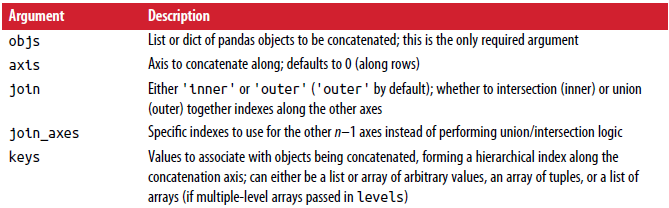

### In-class Exercise (Contd')

Please read the day1-visits and day2-visits data and store them in `day1` and `day2` dataframes separately.

In [ ]:
day1 = pd.read_excel('day1-visits.xlsx');
day1.set_index('Student', inplace=True)
day1

,PPT,Video,Quiz,Assignment
Student,,,,
1,0,1,0,1
2,1,1,0,1
3,0,0,0,0
4,1,0,1,0
5,0,0,0,0
6,0,0,0,0
7,0,0,1,0
8,0,1,1,1


In [ ]:
day2 = pd.read_excel('day1-visits.xlsx');
day2.set_index('Student', inplace=True)
day2

,PPT,Video,Quiz,Assignment
Student,,,,
1,0,1,0,1
2,1,1,0,1
3,0,0,0,0
4,1,0,1,0
5,0,0,0,0
6,0,0,0,0
7,0,0,1,0
8,0,1,1,1


Use the `concat` function to merge `day1` and `day2` dataframes with the corresponding indices `Day1` and `Day2`:

In [ ]:
day12 = pd.concat([day1, day2], keys = ['Day1', 'Day2'])
day12

PPT  Video  Quiz  Assignment
     Student                              
Day1 1          0      1     0           1
     2          1      1     0           1
     3          0      0     0           0
     4          1      0     1           0
     5          0      0     0           0
     6          0      0     0           0
     7          0      0     1           0
     8          0      1     1           1
Day2 1          0      1     0           1
     2          1      1     0           1
     3          0      0     0           0
     4          1      0     1           0
     5          0      0     0           0
     6          0      0     0           0
     7          0      0     1           0
     8          0      1     1           1

Swap the levels of row index so that `Student` will be level 1 (instead of 2):

In [ ]:
day12 = day12.swaplevel(0,1).sort_index(level = 0)
day12

PPT  Video  Quiz  Assignment
Student                                   
1       Day1    0      1     0           1
        Day2    0      1     0           1
2       Day1    1      1     0           1
        Day2    1      1     0           1
3       Day1    0      0     0           0
        Day2    0      0     0           0
4       Day1    1      0     1           0
        Day2    1      0     1           0
5       Day1    0      0     0           0
        Day2    0      0     0           0
6       Day1    0      0     0           0
        Day2    0      0     0           0
7       Day1    0      0     1           0
        Day2    0      0     1           0
8       Day1    0      1     1           1
        Day2    0      1     1           1

After these operations, actually at the end, we were able to build a single dataset from daily data. And, this final dataset actually is similar to the dataset we used at the beginning of the in-class exercise (`student-visits.xlsx`)

## 4. Reshaping and Pivoting
There are a number of basic operations for rearranging tabular data. These are called *reshape* or *pivot* operations.

### 4.1. Reshaping with Hierarchical Indexing
Hierarchical indexing allows to rearrange data consistently in a DataFrame. There are 2 primary actions:
* 1. stack - It *rotates* or pivots from columns to rows.
* 2. unstack - Pivots rows into columns.

I’ll illustrate these operations through a series of examples. Consider a small DataFrame with string arrays as row and column indexes:

In [ ]:
data = pd.DataFrame(np.arange(6).reshape((2,3)),
                   index=pd.Index(['Ohio', 'Colorado'], name='state'),
                   columns = pd.Index(['one', 'two', 'three'],
                                     name = 'number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


Using the `stack` method on this data pivots the columns into the rows, producing a
Series:

In [ ]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

From a hierarchically indexed Series, you can rearrange the data back into a Data‐
Frame with `unstack`:

In [ ]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


By default the **innermost** index gets 'stacked' or 'unstacked'. You can unstack a different level by passing a level number or name.

In [ ]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [ ]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


When you unstack in a DataFrame, the level unstacked becomes the lowest level in
the result:

In [ ]:
df = pd.DataFrame({'left': result, 'right': result+5},
                 columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [ ]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

When calling stack, we can indicate the name of the axis to stack:

In [ ]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

### In-class Exercise [Contd']

The following code imports and displays the `student-visits.xlsx` data.

In [ ]:
studentVisits = pd.read_excel('student-visits.xlsx', index_col=[0,1])
studentVisits.head()

PPT  Video  Quiz  Assignment
WeekDay Student                              
1       6          0      1     0           0
        9          1      0     1           1
        10         1      1     0           1
        1          1      0     1           1
        2          0      1     0           1

Our goal is to convert this data into the following format:

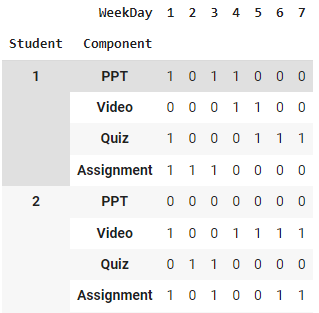

In [ ]:
studentVisits.unstack('WeekDay')

PPT                   Video        ... Quiz       Assignment           \
WeekDay   1  2  3  4  5  6  7     1  2  3  ...    5  6  7          1  2  3  4   
Student                                    ...                                  
1         1  0  1  1  0  0  0     0  0  0  ...    1  1  1          1  1  1  0   
2         0  0  0  0  0  0  0     1  0  0  ...    0  0  0          1  0  1  0   
3         1  1  0  1  1  1  0     1  0  1  ...    0  0  0          0  0  0  1   
4         0  0  1  1  0  0  0     0  0  1  ...    1  0  1          0  1  1  1   
5         1  0  1  0  1  0  1     1  1  1  ...    0  0  1          1  0  0  1   
6         0  1  0  1  1  0  0     1  1  1  ...    1  0  1          0  1  0  1   
7         1  1  0  0  0  1  1     1  0  0  ...    0  0  1          0  1  0  1   
8         1  0  1  1  0  0  0     0  0  1  ...    0  0  0          0  1  1  1   
9         1  0  1  0  1  1  1     0  0  0  ...    0  1  1          1  0  0  1   
10        1  0  1  0  0  0  0     1  1  1  ...    0  1  1          1  1  0  0   

                  
WeekDay  5  6  7  
Student           
1        0  0  0  
2        0  1  1  
3        0  1  0  
4        1  0  0  
5        1  1  1  
6        0  0  0  
7        1  0  0  
8        1  0  1  
9        0  1  0  
10       1  0  0  

[10 rows x 28 columns]

In [ ]:
studentVisits.stack(0).unstack('WeekDay')

WeekDay             1  2  3  4  5  6  7
Student                                
1       PPT         1  0  1  1  0  0  0
        Video       0  0  0  1  1  0  0
        Quiz        1  0  0  0  1  1  1
        Assignment  1  1  1  0  0  0  0
2       PPT         0  0  0  0  0  0  0
        Video       1  0  0  1  1  1  1
        Quiz        0  1  1  0  0  0  0
        Assignment  1  0  1  0  0  1  1
3       PPT         1  1  0  1  1  1  0
        Video       1  0  1  0  0  0  0
        Quiz        1  1  0  1  0  0  0
        Assignment  0  0  0  1  0  1  0
4       PPT         0  0  1  1  0  0  0
        Video       0  0  1  0  0  0  0
        Quiz        0  0  1  0  1  0  1
        Assignment  0  1  1  1  1  0  0
5       PPT         1  0  1  0  1  0  1
        Video       1  1  1  0  1  1  0
        Quiz        1  1  1  0  0  0  1
        Assignment  1  0  0  1  1  1  1
6       PPT         0  1  0  1  1  0  0
        Video       1  1  1  0  1  0  1
        Quiz        0  1  1  1  1  0  1
        Assignment  0  1  0  1  0  0  0
7       PPT         1  1  0  0  0  1  1
        Video       1  0  0  1  1  0  0
        Quiz        1  1  0  0  0  0  1
        Assignment  0  1  0  1  1  0  0
8       PPT         1  0  1  1  0  0  0
        Video       0  0  1  1  1  1  0
        Quiz        1  0  0  1  0  0  0
        Assignment  0  1  1  1  1  0  1
9       PPT         1  0  1  0  1  1  1
        Video       0  0  0  0  1  0  1
        Quiz        1  0  1  0  0  1  1
        Assignment  1  0  0  1  0  1  0
10      PPT         1  0  1  0  0  0  0
        Video       1  1  1  0  1  1  0
        Quiz        0  0  1  0  0  1  1
        Assignment  1  1  0  0  1  0  0

### 4.2. Pivoting "Long" to "Wide" Format

Pivoting your data allows you to reshape it in a way that makes it easier to understand or analyze. 

Often you’ll use a pivot to demonstrate the relationship between two columns that can be difficult to reason about before the pivot.

<img src="https://pandas.pydata.org/docs/_images/reshaping_pivot.png" width=700/><br>
<sub><sup>Image is retrieved from https://pandas.pydata.org</sup></sub>

For example, you may want to pivot your table, if you want to better demonstrate how the life expectancy changes over years for each continent:

<img src="https://i2.wp.com/cmdlinetips.com/wp-content/uploads/2018/12/pivot_example_Pandas.jpg" >

<sub><sup>Image is retrieved from https://cmdlinetips.com/2018/12/pivot-table-in-python-pandas/</sup></sub>


To use the pivot method in Pandas, you need to specify three parameters:

* `Index`: Which column should be used to identify and order your rows vertically
* `Columns`: Which column should be used to create the new columns in our reshaped DataFrame. Each unique value in the column stated here will create a column in our new DataFrame.
* `Values`: Which column(s) should be used to fill the values in the cells of our DataFrame.

Let's first load some sample data about life expectancy in different countries:

In [ ]:
data_url = 'http://bit.ly/2cLzoxH'
df = pd.read_csv(data_url)
print(df.head(20))

        country  year         pop continent  lifeExp    gdpPercap
0   Afghanistan  1952   8425333.0      Asia   28.801   779.445314
1   Afghanistan  1957   9240934.0      Asia   30.332   820.853030
2   Afghanistan  1962  10267083.0      Asia   31.997   853.100710
3   Afghanistan  1967  11537966.0      Asia   34.020   836.197138
4   Afghanistan  1972  13079460.0      Asia   36.088   739.981106
5   Afghanistan  1977  14880372.0      Asia   38.438   786.113360
6   Afghanistan  1982  12881816.0      Asia   39.854   978.011439
7   Afghanistan  1987  13867957.0      Asia   40.822   852.395945
8   Afghanistan  1992  16317921.0      Asia   41.674   649.341395
9   Afghanistan  1997  22227415.0      Asia   41.763   635.341351
10  Afghanistan  2002  25268405.0      Asia   42.129   726.734055
11  Afghanistan  2007  31889923.0      Asia   43.828   974.580338
12      Albania  1952   1282697.0    Europe   55.230  1601.056136
13      Albania  1957   1476505.0    Europe   59.280  1942.284244
14      Al

We will pivot table to create columns from unique `country` values, and fill the cells with the `lifeExp`, while keeping `year` as the index:

In [ ]:
pivoted = df.pivot('year', 'country', 'lifeExp')
pivoted

country,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,...,Uganda,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Bank and Gaza,Yemen Rep.,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1952,28.801,55.230,43.077,30.015,62.485,69.120,66.800,50.939,37.484,68.000,...,39.978,69.180,68.440,66.071,55.088,40.412,43.160,32.548,42.038,48.451
1957,30.332,59.280,45.685,31.999,64.399,70.330,67.480,53.832,39.348,69.240,...,42.571,70.420,69.490,67.044,57.907,42.887,45.671,33.970,44.077,50.469
1962,31.997,64.820,48.303,34.000,65.142,70.930,69.540,56.923,41.216,70.250,...,45.344,70.760,70.210,68.253,60.770,45.363,48.127,35.180,46.023,52.358
1967,34.020,66.220,51.407,35.985,65.634,71.100,70.140,59.923,43.453,70.940,...,48.051,71.360,70.760,68.468,63.479,47.838,51.631,36.984,47.768,53.995
1972,36.088,67.690,54.518,37.928,67.065,71.930,70.630,63.300,45.252,71.440,...,51.016,72.010,71.340,68.673,65.712,50.254,56.532,39.848,50.107,55.635
1977,38.438,68.930,58.014,39.483,68.481,73.490,72.170,65.593,46.923,72.800,...,50.350,72.760,73.380,69.481,67.456,55.764,60.765,44.175,51.386,57.674
1982,39.854,70.420,61.368,39.942,69.942,74.740,73.180,69.052,50.009,73.930,...,49.849,74.040,74.650,70.805,68.557,58.816,64.406,49.113,51.821,60.363
1987,40.822,72.000,65.799,39.906,70.774,76.320,74.940,70.750,52.819,75.350,...,51.509,75.007,75.020,71.918,70.190,62.820,67.046,52.922,50.821,62.351
1992,41.674,71.581,67.744,40.647,71.868,77.560,76.040,72.601,56.018,76.460,...,48.825,76.420,76.090,72.752,71.150,67.662,69.718,55.599,46.100,60.377


Next, we will pivot table to create columns from unique `continent` values. In this case, since there will be duplicate `year` specific to countries within each continent, we have to clean the duplicates. 

We choose to keep the last row's data for each continent by specifying `keep="last"`:

In [ ]:
df_continents = df.drop_duplicates(subset=['year','continent'], keep="last")
pivoted = df_continents.pivot('year', 'continent', 'lifeExp')
pivoted

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,48.451,55.088,32.548,69.180,69.390
1957,50.469,57.907,33.970,70.420,70.260
1962,52.358,60.770,35.180,70.760,71.240
1967,53.995,63.479,36.984,71.360,71.520
1972,55.635,65.712,39.848,72.010,71.890
1977,57.674,67.456,44.175,72.760,72.220
1982,60.363,68.557,49.113,74.040,73.840
1987,62.351,70.190,52.922,75.007,74.320
1992,60.377,71.150,55.599,76.420,76.330


If you want to fill the cells with more data, you will obtain a DataFrame with hierarchical columns:

In [ ]:
df_continents = df.drop_duplicates(subset=['year','continent'])
pivoted = df_continents.pivot('year', 'continent', ['pop', 'lifeExp'])
pivoted

pop                                                lifeExp  \
continent      Africa    Americas        Asia     Europe     Oceania  Africa   
year                                                                           
1952        9279525.0  17876956.0   8425333.0  1282697.0   8691212.0  43.077   
1957       10270856.0  19610538.0   9240934.0  1476505.0   9712569.0  45.685   
1962       11000948.0  21283783.0  10267083.0  1728137.0  10794968.0  48.303   
1967       12760499.0  22934225.0  11537966.0  1984060.0  11872264.0  51.407   
1972       14760787.0  24779799.0  13079460.0  2263554.0  13177000.0  54.518   
1977       17152804.0  26983828.0  14880372.0  2509048.0  14074100.0  58.014   
1982       20033753.0  29341374.0  12881816.0  2780097.0  15184200.0  61.368   
1987       23254956.0  31620918.0  13867957.0  3075321.0  16257249.0  65.799   
1992       26298373.0  33958947.0  16317921.0  3326498.0  17481977.0  67.744   
1997       29072015.0  36203463.0  22227415.0  3428038.0  18565243.0  69.152   
2002       31287142.0  38331121.0  25268405.0  3508512.0  19546792.0  70.994   
2007       33333216.0  40301927.0  31889923.0  3600523.0  20434176.0  72.301   

                                            
continent Americas    Asia  Europe Oceania  
year                                        
1952        62.485  28.801  55.230  69.120  
1957        64.399  30.332  59.280  70.330  
1962        65.142  31.997  64.820  70.930  
1967        65.634  34.020  66.220  71.100  
1972        67.065  36.088  67.690  71.930  
1977        68.481  38.438  68.930  73.490  
1982        69.942  39.854  70.420  74.740  
1987        70.774  40.822  72.000  76.320  
1992        71.868  41.674  71.581  77.560  
1997        73.275  41.763  72.950  78.830  
2002        74.340  42.129  75.651  80.370  
2007        75.320  43.828  76.423  81.235

There is another useful pivoting function in pandas, which is called `pivot_table`.

If you have more than one entry in any index+column, then you should chooce `pivot_table`. 

This was the case for us when we wanted to create columns from `continent` data, where we dropped duplicate year+continent values.

However, with `pivot_table` you do not (and should not) drop any duplicates. This is because the aggregated values will be computed based on duplicate values. 

By default mean values are computed as shown in the following example:

In [ ]:
df.pivot_table(index='year', columns='continent', values='lifeExp')

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,39.135500,53.27984,46.314394,64.408500,69.2550
1957,41.266346,55.96028,49.318544,66.703067,70.2950
1962,43.319442,58.39876,51.563223,68.539233,71.0850
1967,45.334538,60.41092,54.663640,69.737600,71.3100
1972,47.450942,62.39492,57.319269,70.775033,71.9100
1977,49.580423,64.39156,59.610556,71.937767,72.8550
1982,51.592865,66.22884,62.617939,72.806400,74.2900
1987,53.344788,68.09072,64.851182,73.642167,75.3200
1992,53.629577,69.56836,66.537212,74.440100,76.9450


### In-class Exercise

In the last part of the in-class exercise we will use a different data source:  `raw-student-visits.xlsx`

Import this file into a dataframe called `rawVisits`.

In [ ]:
rawVisits = pd.read_excel('raw-student-visits.xlsx')
rawVisits.head(5)

,WeekDay,Student,Component,TimeSpent
0,1,1,PPT,2
1,2,1,Quiz,6
2,3,1,PPT,15
3,4,1,PPT,5
4,5,1,Assignment,10


We first want to obtain the time spent daily (regardless the course component):

In [ ]:
rawVisits.pivot(index = "Student", columns = "WeekDay", values = "TimeSpent")

WeekDay,1,2,3,4,5,6,7
Student,,,,,,,
1,2,6,15,5,10,9,8
2,11,15,10,14,3,5,3
3,12,15,3,4,5,4,13
4,10,12,12,5,7,3,5
5,1,14,15,14,12,12,7
6,2,10,1,12,13,5,8
7,12,1,2,4,1,7,4
8,6,3,11,9,2,2,11
9,13,5,2,3,9,14,14


Next, we want to obtain how much time students spent (throughout the week) on each component in average:

In [ ]:
rawVisits.pivot_table(index = "Student", columns = "Component", values = "TimeSpent")

Component,Assignment,PPT,Quiz,Video
Student,,,,
1,10.000000,7.5,7.500000,NaN
2,10.000000,10.0,3.000000,9.333333
3,4.000000,14.0,8.500000,3.500000
4,8.500000,3.0,5.000000,9.666667
5,12.000000,1.0,14.333333,9.500000
6,11.000000,7.5,4.666667,NaN
7,4.333333,1.0,4.000000,12.000000
8,11.000000,5.5,NaN,3.666667
9,14.000000,2.0,5.000000,9.750000


As the last task, we want to obtain the total time spent (instead of average) for each component.

In [ ]:
rawVisits.pivot_table(index = "Student", columns = "Component", values = "TimeSpent", aggfunc = "sum")

Component,Assignment,PPT,Quiz,Video
Student,,,,
1,10.0,30.0,15.0,NaN
2,20.0,10.0,3.0,28.0
3,4.0,28.0,17.0,7.0
4,17.0,3.0,5.0,29.0
5,12.0,1.0,43.0,19.0
6,22.0,15.0,14.0,NaN
7,13.0,2.0,4.0,12.0
8,22.0,11.0,NaN,11.0
9,14.0,2.0,5.0,39.0
